# Import libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import dataset

In [44]:
df = pd.read_csv('Diabetes_raw_dataset.csv')
df.head()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,1,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,2,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,3,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,4,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,5,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


# Data exploration and cleaning

# Checking for null values if there's any in the dataset.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient number        500 non-null    int64  
 1    Cholesterol (mg/dl)  499 non-null    float64
 2   Glucose (mg/dl)       499 non-null    float64
 3   HDL Chol (mg/dl)      499 non-null    float64
 4   TChol/HDL ratio       499 non-null    float64
 5   Age                   500 non-null    int64  
 6   Gender                495 non-null    object 
 7   Height /stature (cm)  500 non-null    float64
 8   weight1 (Kg)          500 non-null    float64
 9   weight2(Kg)           500 non-null    int64  
 10  BMI (Kg/m^2)          500 non-null    float64
 11  Systolic BP           498 non-null    float64
 12  Diastolic BP          498 non-null    float64
 13  waist (cm)            500 non-null    float64
 14  hip (cm)              500 non-null    float64
 15  Diabetes              4

In [46]:
df.isna().sum()

Patient number          0
 Cholesterol (mg/dl)    1
Glucose (mg/dl)         1
HDL Chol (mg/dl)        1
TChol/HDL ratio         1
Age                     0
Gender                  5
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             2
Diastolic BP            2
waist (cm)              0
hip (cm)                0
Diabetes                7
dtype: int64

# Rows with null values.

In [47]:
df = df.dropna()
df.isna().sum()

Patient number          0
 Cholesterol (mg/dl)    0
Glucose (mg/dl)         0
HDL Chol (mg/dl)        0
TChol/HDL ratio         0
Age                     0
Gender                  0
Height /stature (cm)    0
weight1 (Kg)            0
weight2(Kg)             0
BMI (Kg/m^2)            0
Systolic BP             0
Diastolic BP            0
waist (cm)              0
hip (cm)                0
Diabetes                0
dtype: int64

In [48]:
df.head()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,1,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,2,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,3,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,4,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,5,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


# Check the range for values

In [49]:
df.describe()

,Patient number,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm)
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.00000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,242.904564,208.622407,129.300830,50.311203,4.477386,46.626556,167.240664,83.00695,80.163900,29.933983,136.732365,82.865145,95.849378,109.072407
std,141.423456,50.991485,421.237903,17.151721,1.657719,17.458402,12.622313,46.99381,18.580501,18.193906,23.028613,13.565291,15.221900,14.231773
min,1.000000,2.000000,48.000000,1.000000,1.500000,19.000000,0.000000,0.00000,0.000000,0.000000,90.000000,48.000000,0.000000,76.200000
25%,121.250000,179.000000,81.000000,39.000000,3.200000,31.000000,160.000000,68.21250,68.000000,23.092500,120.000000,74.000000,83.800000,99.100000
50%,241.500000,204.000000,89.000000,46.000000,4.200000,43.000000,167.600000,79.00000,78.000000,28.150000,136.000000,82.000000,94.000000,106.700000
75%,361.750000,230.000000,107.750000,59.000000,5.300000,61.000000,175.300000,90.80000,90.000000,33.905000,148.000000,90.000000,104.100000,116.800000
max,499.000000,500.000000,9091.000000,120.000000,19.300000,92.000000,193.000000,996.98000,148.000000,377.280000,250.000000,124.000000,142.200000,162.600000


# Type of categories we've for categorical features.

In [50]:
df['Diabetes'].value_counts()

No diabetes    410
Diabetes        72
Name: Diabetes, dtype: int64

In [51]:
df['Gender'].value_counts()

female    277
male      205
Name: Gender, dtype: int64

# Compared to non-diabetic patients, the number of diabetes patients is quite small.

- The `Patient number` column has been eliminated because diabetes prediction does not require it for internal records.

In [52]:
df = df.drop(columns=['Patient number'])
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,Gender,Height /stature (cm),weight1 (Kg),weight2(Kg),BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),hip (cm),Diabetes
0,193.0,77.0,49.0,3.9,19,female,154.9,54.93,54,22.88,118.0,70.0,81.3,96.5,No diabetes
1,146.0,79.0,41.0,3.6,19,female,152.4,98.97,61,42.61,108.0,58.0,83.8,101.6,No diabetes
2,217.0,75.0,54.0,4.0,20,female,170.2,116.22,85,40.13,110.0,72.0,101.6,114.3,No diabetes
3,226.0,97.0,70.0,3.2,20,female,162.6,54.03,52,20.44,122.0,64.0,78.7,99.1,No diabetes
4,164.0,91.0,67.0,2.4,20,female,177.8,83.08,64,26.28,122.0,86.0,81.3,99.1,No diabetes


# Plot the heat map.

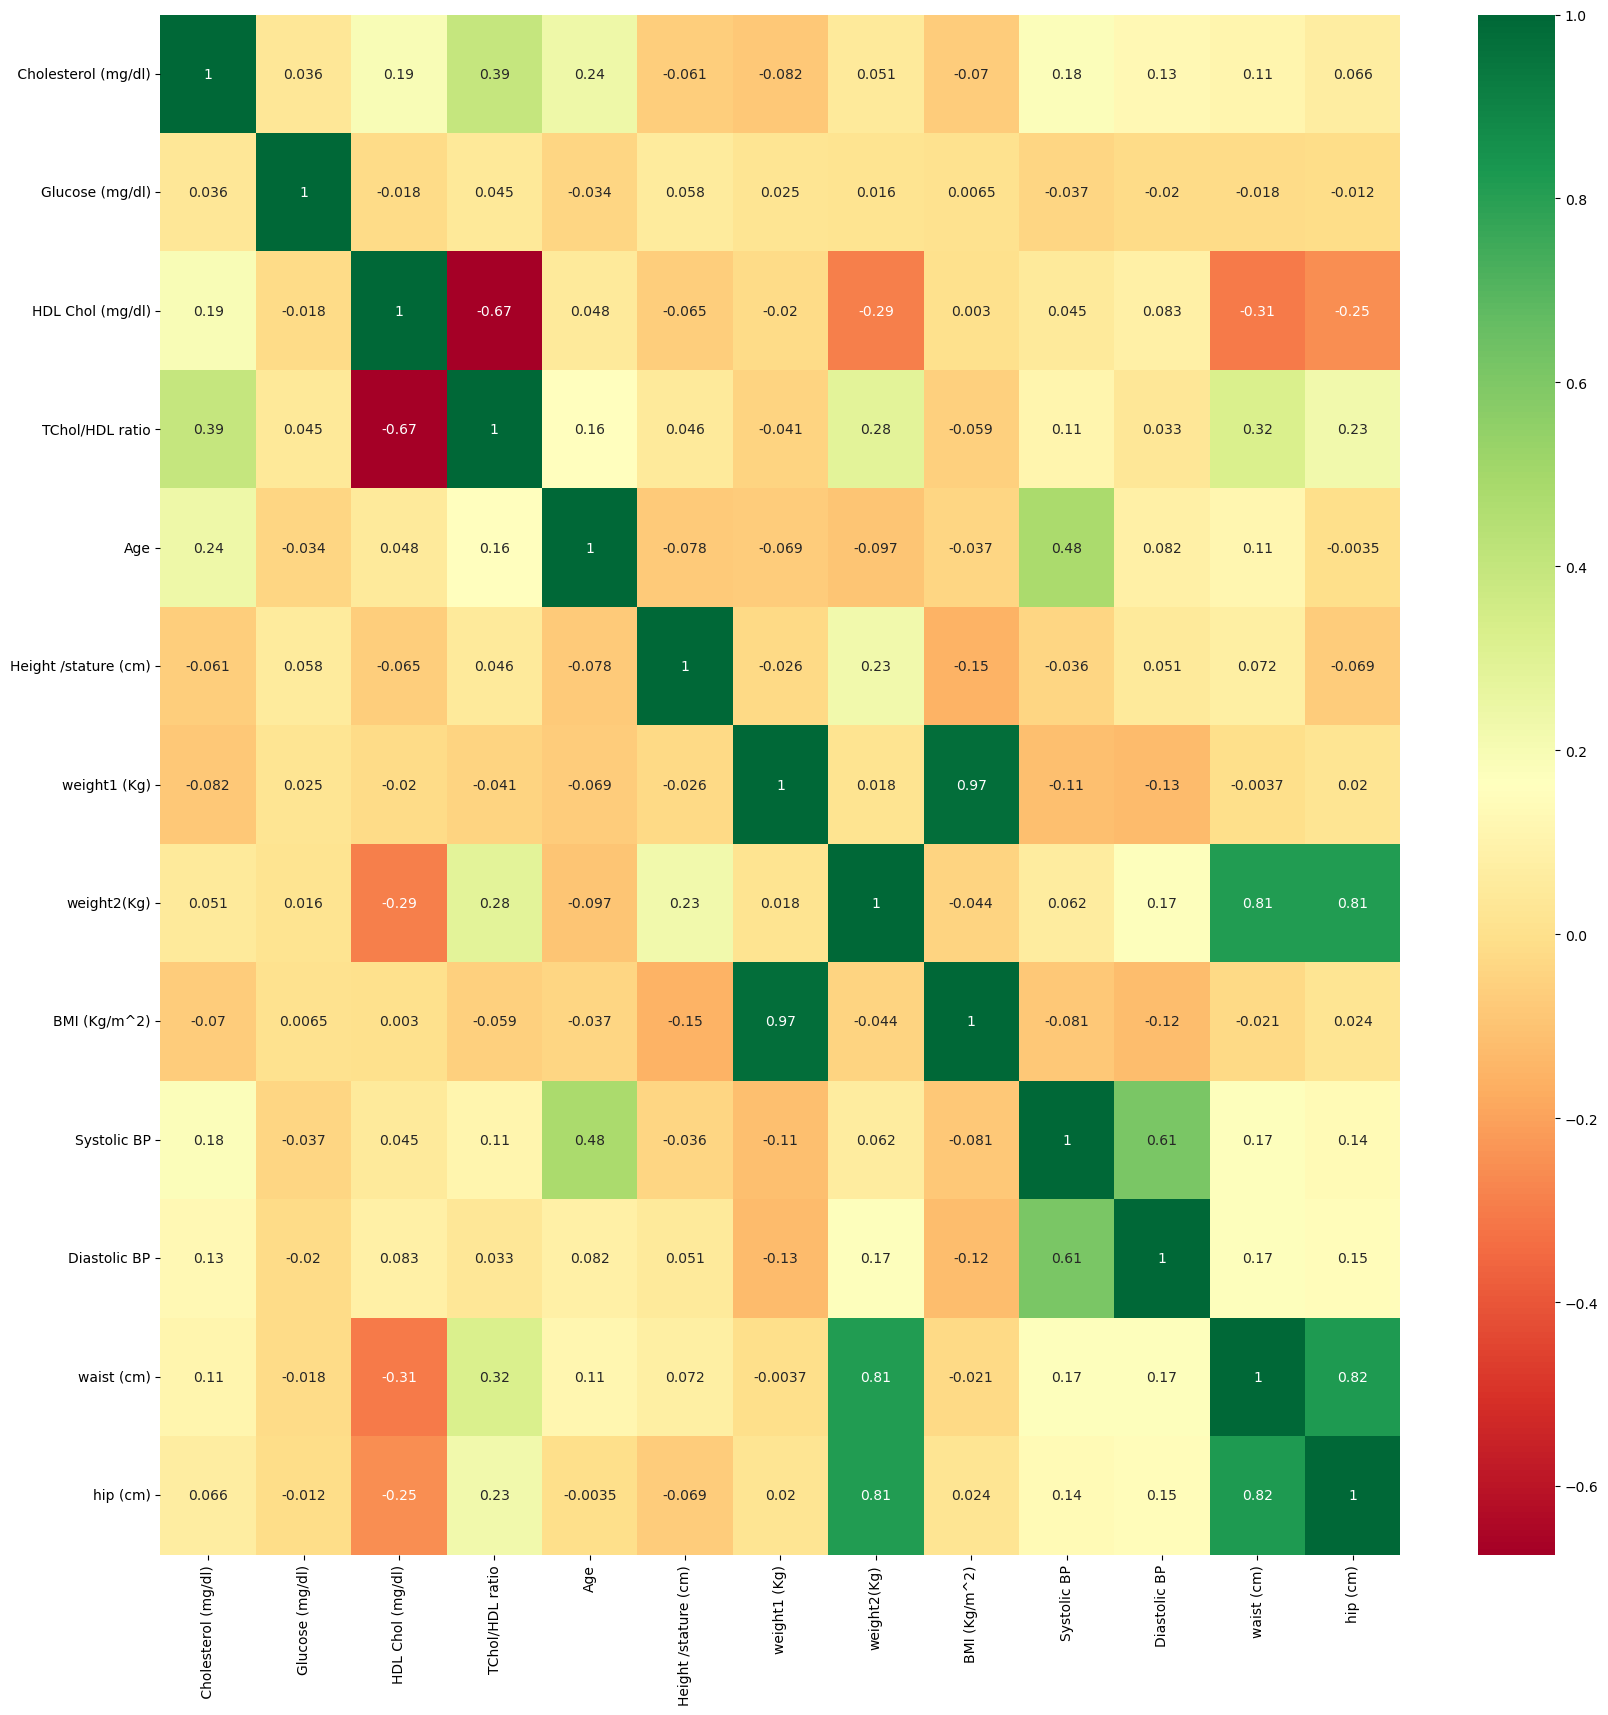

In [53]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

- Since we already have the BMI figures for each patient, I will also eliminate the Height, Weight1 and Weight2 columns.

- According to Article 2, the two best indicators for predicting Type 2 diabetes are the WHR (Waist Hip Ratio) and WC (Waist Circumference). We have the patient's waist and hip measurements, and we can calculate the WHR by dividing those measures by the patient's waist (in cm) and hip (in cm). Since we already know the ratio and it has not been demonstrated that the hip measurement alone contributes to Type 2 diabetes, we will then remove the hip (cm) column.

- The Diabetes column will be changed to read 1 for men and 0 for women.

- The Gender column will be transformed to have values of 1 for females and 0 for males.

In [54]:
whr = df['waist (cm)'] / df['hip (cm)']
whr = whr.round(2)

In [55]:
df['WHR'] = whr

In [56]:
df = pd.get_dummies(df, columns=['Gender'])
df.loc[df['Diabetes'] == 'No diabetes', 'Diabetes'] = 0
df.loc[df['Diabetes'] == 'Diabetes', 'Diabetes'] = 1

In [57]:
df = df.drop(columns=['hip (cm)', 'Height /stature (cm)', 'weight1 (Kg)','weight2(Kg)' ])
df.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),Diabetes,WHR,Gender_female,Gender_male
0,193.0,77.0,49.0,3.9,19,22.88,118.0,70.0,81.3,0,0.84,1,0
1,146.0,79.0,41.0,3.6,19,42.61,108.0,58.0,83.8,0,0.82,1,0
2,217.0,75.0,54.0,4.0,20,40.13,110.0,72.0,101.6,0,0.89,1,0
3,226.0,97.0,70.0,3.2,20,20.44,122.0,64.0,78.7,0,0.79,1,0
4,164.0,91.0,67.0,2.4,20,26.28,122.0,86.0,81.3,0,0.82,1,0


In [58]:
df.columns

Index([' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age', 'BMI (Kg/m^2)', 'Systolic BP', 'Diastolic BP',
       'waist (cm)', 'Diabetes', 'WHR', 'Gender_female', 'Gender_male'],
      dtype='object')

In [59]:
X = df[[' Cholesterol (mg/dl)', 'Glucose (mg/dl)', 'HDL Chol (mg/dl)',
       'TChol/HDL ratio', 'Age','BMI (Kg/m^2)', 'Systolic BP', 'Diastolic BP',
       'waist (cm)', 'WHR', 'Gender_female', 'Gender_male']]
y = df[['Diabetes']].astype('int').values

In [60]:
X.head()

,Cholesterol (mg/dl),Glucose (mg/dl),HDL Chol (mg/dl),TChol/HDL ratio,Age,BMI (Kg/m^2),Systolic BP,Diastolic BP,waist (cm),WHR,Gender_female,Gender_male
0,193.0,77.0,49.0,3.9,19,22.88,118.0,70.0,81.3,0.84,1,0
1,146.0,79.0,41.0,3.6,19,42.61,108.0,58.0,83.8,0.82,1,0
2,217.0,75.0,54.0,4.0,20,40.13,110.0,72.0,101.6,0.89,1,0
3,226.0,97.0,70.0,3.2,20,20.44,122.0,64.0,78.7,0.79,1,0
4,164.0,91.0,67.0,2.4,20,26.28,122.0,86.0,81.3,0.82,1,0


# Preprocess the dataset

In [61]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.values)

# Create train test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(385, 385, 97, 97)

In [63]:
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('dt', dt),
                                        ('svm', svm),
                                        ('lr', lr)], 
                           voting='hard')

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Ensemble system accuracy:', accuracy)

Ensemble system accuracy: 0.8762886597938144


c:\Users\manth\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manth\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        84
           1       0.57      0.31      0.40        13

    accuracy                           0.88        97
   macro avg       0.74      0.64      0.67        97
weighted avg       0.86      0.88      0.86        97



<Figure size 1000x700 with 0 Axes>

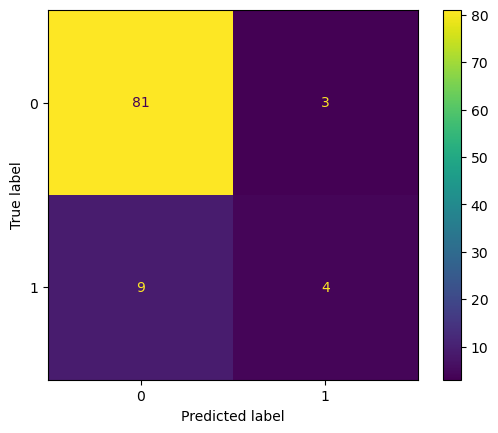

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
ConfusionMatrixDisplay(cm).plot()

# Conclusion

- I think it's crucial to follow the advice of the medical team while attempting to forecast type-2 diabetes and look into additional factors than simply cleaning the dataset and selecting features based on their associations with the dependent variable.

- Medical professionals have a thorough understanding of the biology and physiology at the root of the illness as well as the signs and symptoms that are most suggestive of it. They can offer insightful information on which characteristics should be prioritised and how to read the study' findings.

- Additionally, it's crucial to take into account the model's total performance rather than just how well it performs on a particular parameter, like accuracy. It is ideal to have a model that works effectively for both healthy and vulnerable individuals.